In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/abhi/Downloads/GE.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-06-11,34.153004,34.528313,34.153004,34.465763,15.075547,1477188
1,1990-06-12,34.528313,35.404030,34.403210,35.153828,15.376520,2717170
2,1990-06-13,35.216377,35.404030,35.028725,35.153828,15.376520,2531522
3,1990-06-14,35.028725,35.153828,34.715965,34.841068,15.239713,2062907
4,1990-06-15,34.653416,35.216377,34.590866,35.091274,15.349158,5397970
...,...,...,...,...,...,...,...
8309,2023-06-05,105.800003,105.800003,104.099998,104.099998,104.099998,4077200
8310,2023-06-06,104.330002,106.110001,104.099998,105.459999,105.459999,6220300
8311,2023-06-07,106.639999,107.330002,105.639999,106.080002,106.080002,7279400
8312,2023-06-08,105.839996,107.220001,105.629997,106.070000,106.070000,3573500


In [5]:
data = df[['Open','High','Low','Close','Adj Close']]

In [6]:
data

,Open,High,Low,Close,Adj Close
0,34.153004,34.528313,34.153004,34.465763,15.075547
1,34.528313,35.404030,34.403210,35.153828,15.376520
2,35.216377,35.404030,35.028725,35.153828,15.376520
3,35.028725,35.153828,34.715965,34.841068,15.239713
4,34.653416,35.216377,34.590866,35.091274,15.349158
...,...,...,...,...,...
8309,105.800003,105.800003,104.099998,104.099998,104.099998
8310,104.330002,106.110001,104.099998,105.459999,105.459999
8311,106.639999,107.330002,105.639999,106.080002,106.080002
8312,105.839996,107.220001,105.629997,106.070000,106.070000


In [7]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8314 entries, 0 to 8313
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8314 non-null   float64
 1   High       8314 non-null   float64
 2   Low        8314 non-null   float64
 3   Close      8314 non-null   float64
 4   Adj Close  8314 non-null   float64
dtypes: float64(5)
memory usage: 324.9 KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close
count,8314.000000,8314.000000,8314.000000,8314.000000,8314.000000
mean,132.516237,133.936953,131.010759,132.497110,90.558104
std,72.984153,73.793061,72.155739,73.009339,46.468849
min,25.145618,25.458376,25.020517,25.270721,11.146931
25%,68.287396,69.523808,67.197502,68.303007,54.126343
50%,125.232693,126.493725,124.271900,125.215176,89.382785
75%,185.897434,187.473724,184.531311,186.077579,130.090485
max,357.668274,363.297913,356.917664,360.295441,198.829575


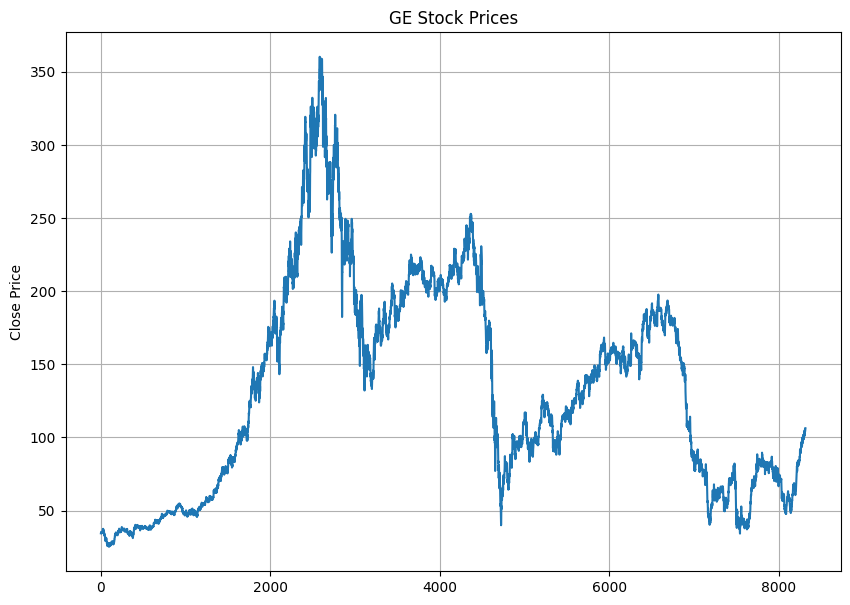

In [10]:
data['Close'].plot(figsize=(10,7), title="GE Stock Prices")
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

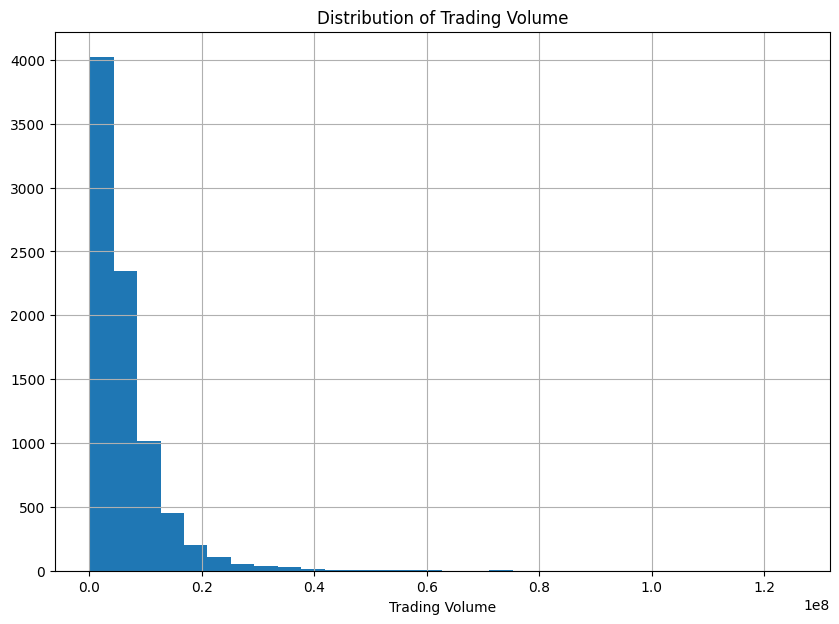

In [11]:
df['Volume'].hist(figsize=(10,7), bins=30)
plt.title("Distribution of Trading Volume")
plt.xlabel('Trading Volume')
plt.grid(True)
plt.show()

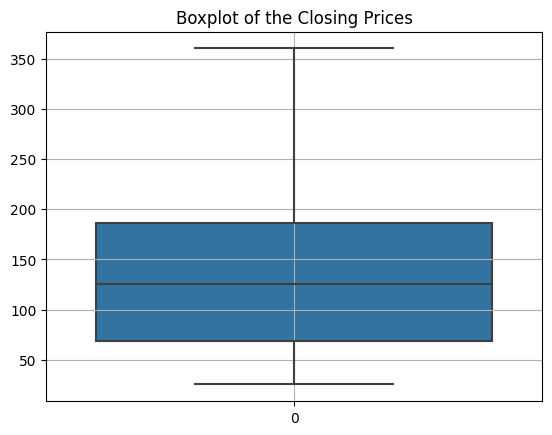

In [12]:
sns.boxplot(data['Close']).set_title("Boxplot of the Closing Prices")
plt.grid(True)
plt.show()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to DateTime
data.set_index(df['Date'], inplace=True)

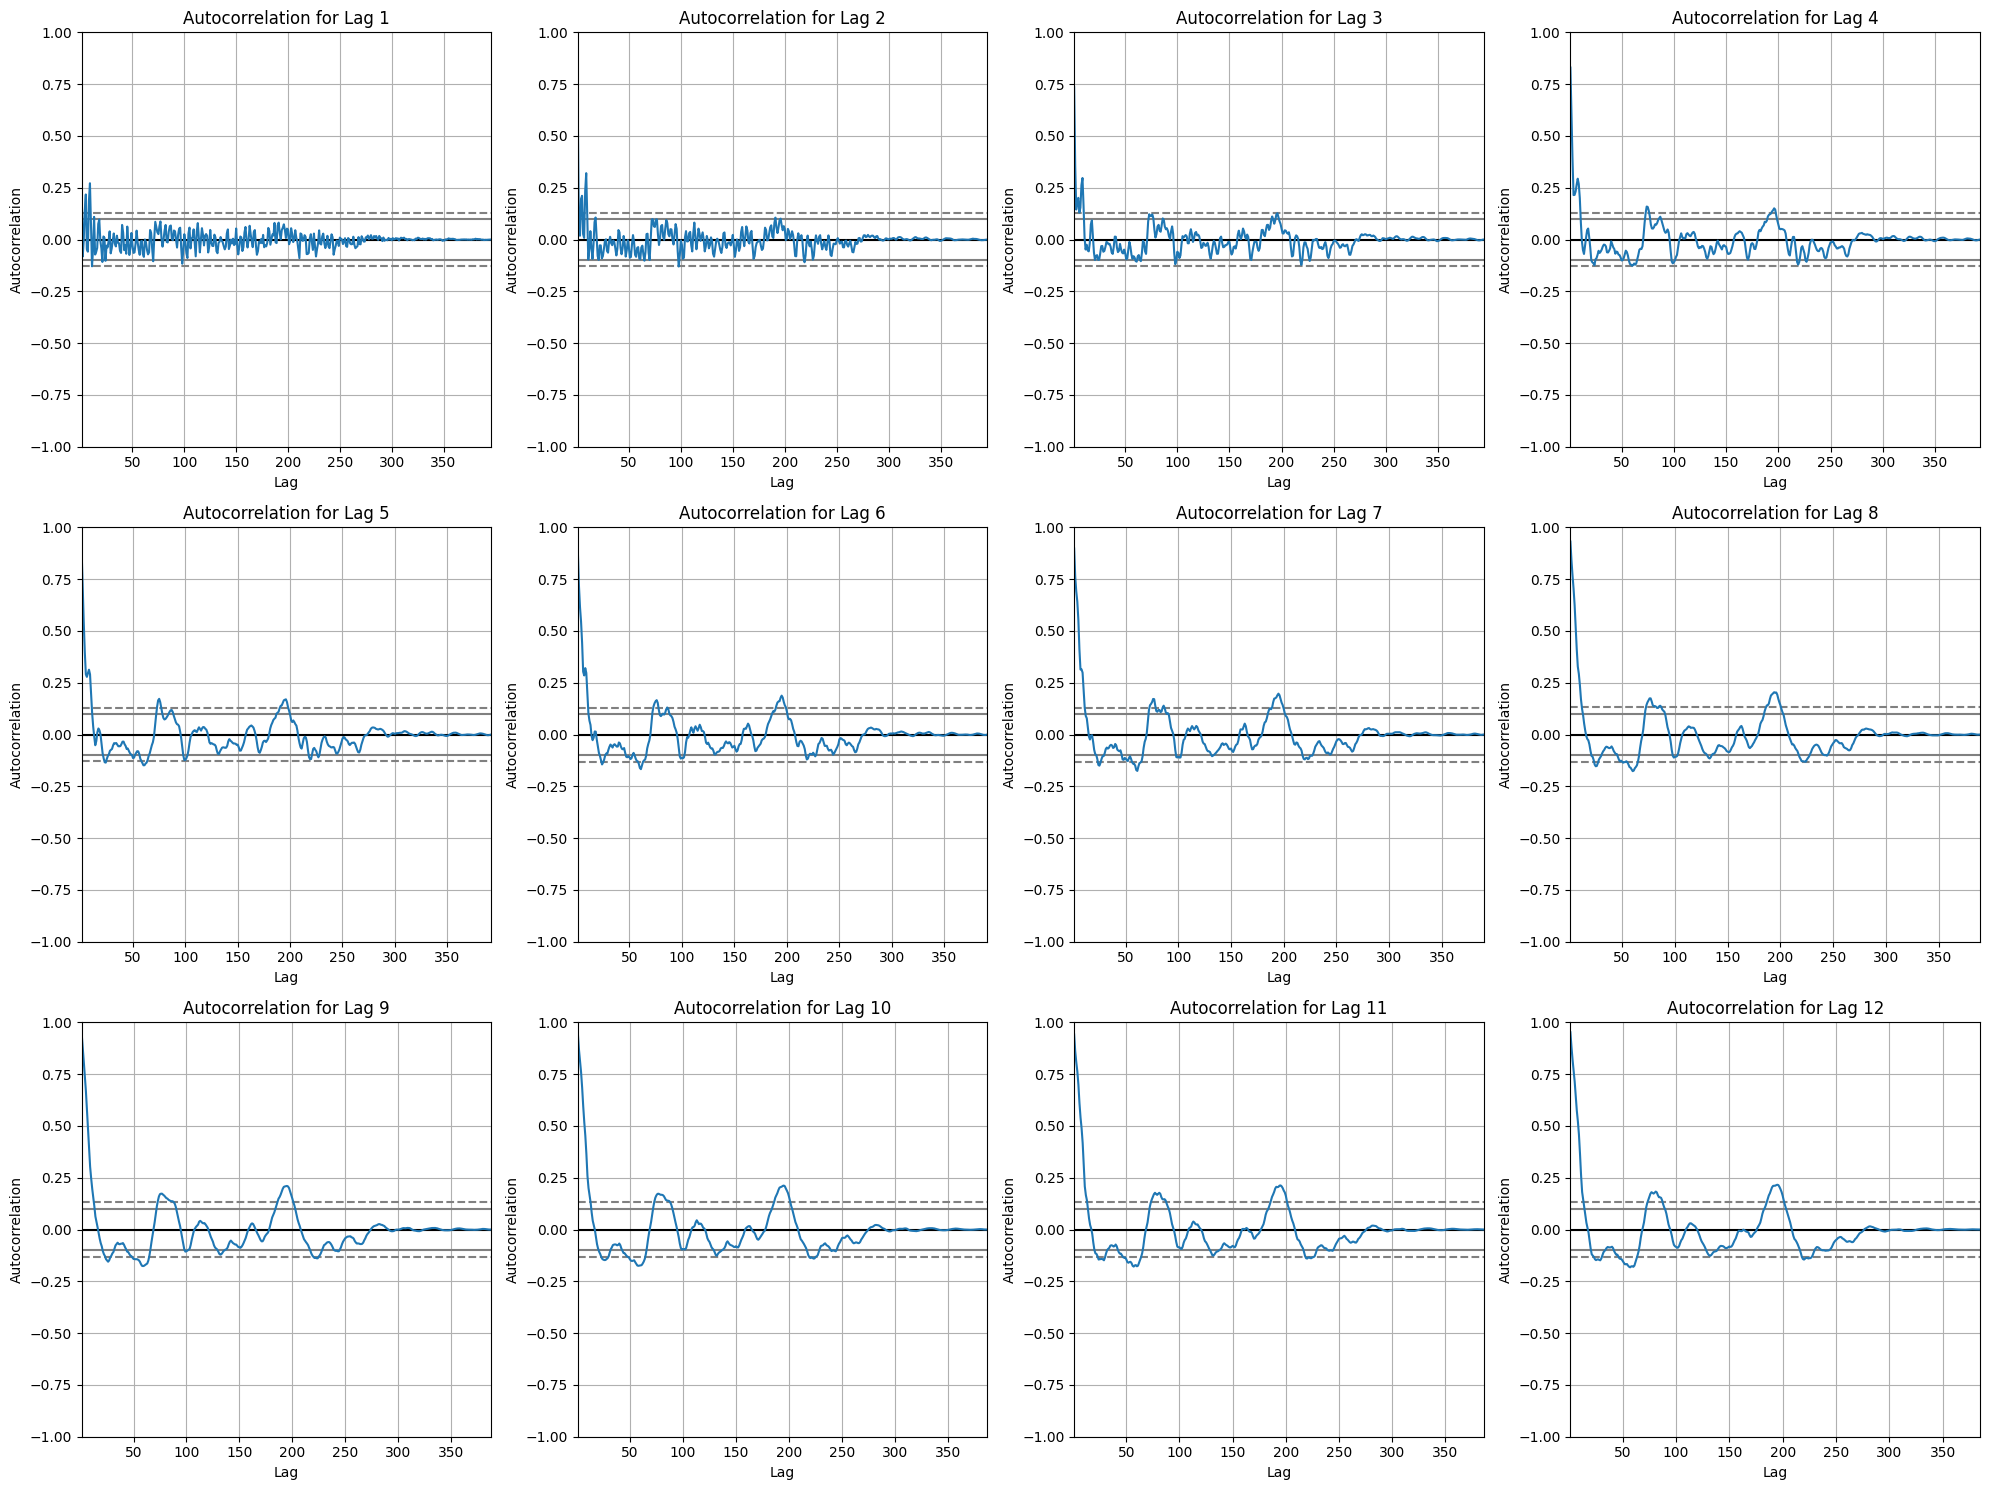

In [14]:
# Autocorrelation plot for lags up to 12 months
# This will be helpful to understand if the past months' data is correlated with the future months' data
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for i in range(12):
    plt.subplot(3, 4, i+1)
    pd.plotting.autocorrelation_plot(data['Close'].resample('M').mean().diff(periods=i+1).dropna())
    plt.title(f"Autocorrelation for Lag {i+1}")
plt.tight_layout()
plt.show()

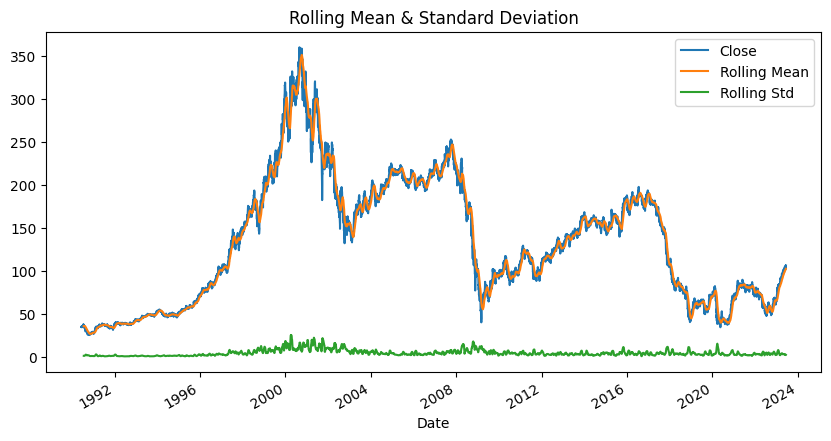

In [15]:
data['Rolling Mean'] = data['Close'].rolling(window=30).mean()
data['Rolling Std'] = data['Close'].rolling(window=30).std()
data[['Close','Rolling Mean','Rolling Std']].plot(figsize=(10,5)).set_title('Rolling Mean & Standard Deviation')
plt.show()

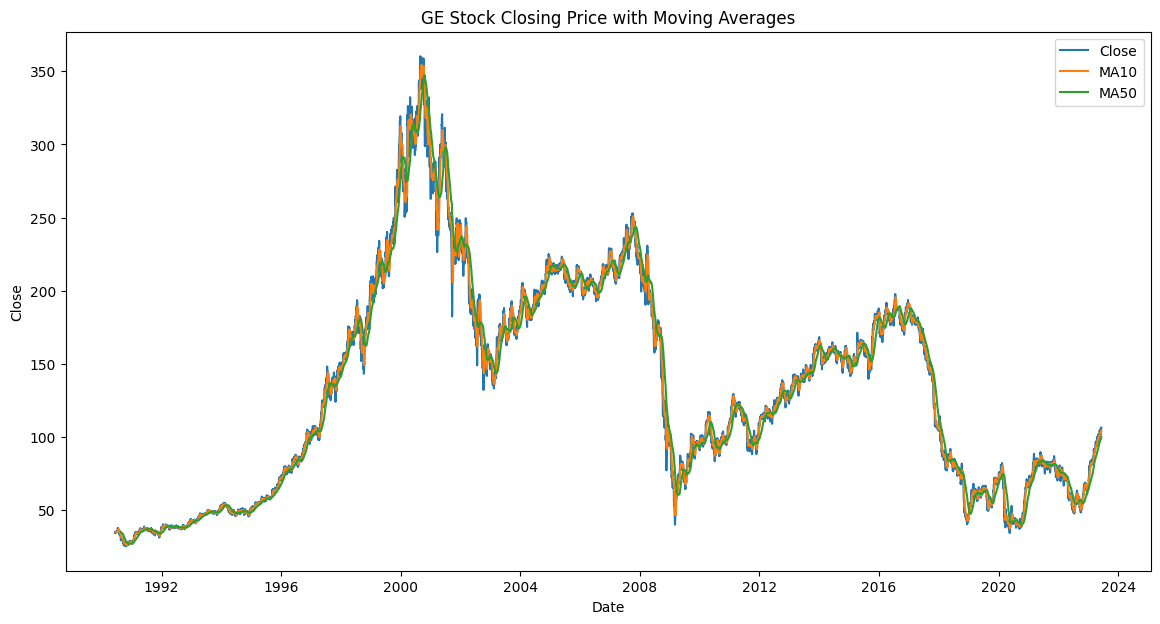

In [16]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()
plt.figure(figsize=(14,7))
sns.lineplot(data = data, x = "Date", y = "Close", label = 'Close')
sns.lineplot(data = data, x = "Date", y = "MA10", label = 'MA10')
sns.lineplot(data = data, x = "Date", y = "MA50", label = 'MA50')
plt.title('GE Stock Closing Price with Moving Averages')
plt.show()

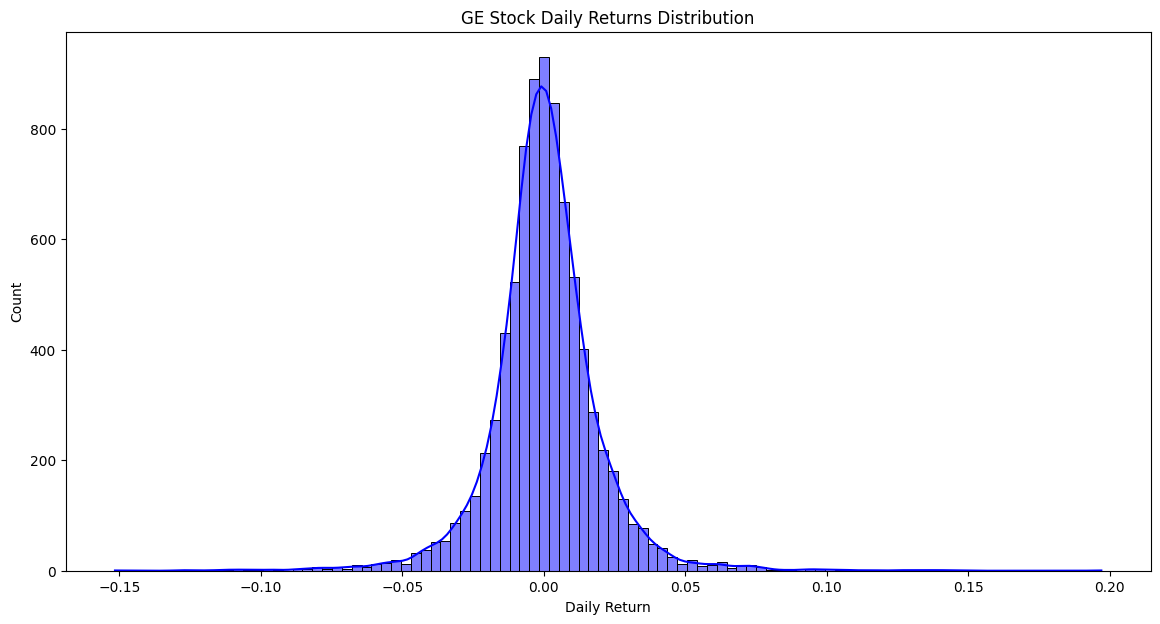

In [17]:
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(14,7))
sns.histplot(data = data, x = "Daily Return", bins = 100, kde = True, color = 'blue')
plt.title('GE Stock Daily Returns Distribution')
plt.show()

In [18]:
data.drop(['Rolling Mean', 'Rolling Std', 'Daily Return', 'MA10','MA50'], axis =1 , inplace = True)

In [19]:
data

,Open,High,Low,Close,Adj Close
Date,,,,,
1990-06-11,34.153004,34.528313,34.153004,34.465763,15.075547
1990-06-12,34.528313,35.404030,34.403210,35.153828,15.376520
1990-06-13,35.216377,35.404030,35.028725,35.153828,15.376520
1990-06-14,35.028725,35.153828,34.715965,34.841068,15.239713
1990-06-15,34.653416,35.216377,34.590866,35.091274,15.349158
...,...,...,...,...,...
2023-06-05,105.800003,105.800003,104.099998,104.099998,104.099998
2023-06-06,104.330002,106.110001,104.099998,105.459999,105.459999
2023-06-07,106.639999,107.330002,105.639999,106.080002,106.080002


In [20]:
train = data.astype(float)

In [21]:
train

,Open,High,Low,Close,Adj Close
Date,,,,,
1990-06-11,34.153004,34.528313,34.153004,34.465763,15.075547
1990-06-12,34.528313,35.404030,34.403210,35.153828,15.376520
1990-06-13,35.216377,35.404030,35.028725,35.153828,15.376520
1990-06-14,35.028725,35.153828,34.715965,34.841068,15.239713
1990-06-15,34.653416,35.216377,34.590866,35.091274,15.349158
...,...,...,...,...,...
2023-06-05,105.800003,105.800003,104.099998,104.099998,104.099998
2023-06-06,104.330002,106.110001,104.099998,105.459999,105.459999
2023-06-07,106.639999,107.330002,105.639999,106.080002,106.080002


<Axes: xlabel='Date'>

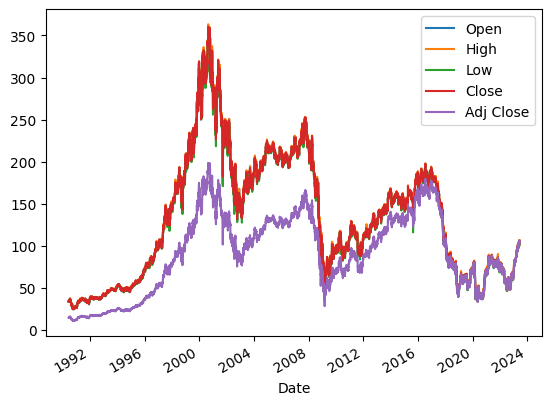

In [22]:
data.plot.line()


Epoch 1/20
6640/6640 - 3s - loss: 0.0032 - 3s/epoch - 427us/step
Epoch 2/20
6640/6640 - 2s - loss: 2.7977e-04 - 2s/epoch - 351us/step
Epoch 3/20
6640/6640 - 2s - loss: 1.9121e-04 - 2s/epoch - 354us/step
Epoch 4/20
6640/6640 - 2s - loss: 1.6537e-04 - 2s/epoch - 365us/step
Epoch 5/20
6640/6640 - 2s - loss: 1.5392e-04 - 2s/epoch - 360us/step
Epoch 6/20
6640/6640 - 2s - loss: 1.4394e-04 - 2s/epoch - 354us/step
Epoch 7/20
6640/6640 - 2s - loss: 1.4013e-04 - 2s/epoch - 344us/step
Epoch 8/20
6640/6640 - 2s - loss: 1.3581e-04 - 2s/epoch - 362us/step
Epoch 9/20
6640/6640 - 2s - loss: 1.3422e-04 - 2s/epoch - 341us/step
Epoch 10/20
6640/6640 - 2s - loss: 1.3294e-04 - 2s/epoch - 341us/step
Epoch 11/20
6640/6640 - 2s - loss: 1.2726e-04 - 2s/epoch - 347us/step
Epoch 12/20
6640/6640 - 3s - loss: 1.2768e-04 - 3s/epoch - 382us/step
Epoch 13/20
6640/6640 - 2s - loss: 1.2519e-04 - 2s/epoch - 369us/step
Epoch 14/20
6640/6640 - 2s - loss: 1.2462e-04 - 2s/epoch - 340us/step
Epoch 15/20
6640/6640 - 2s - loss

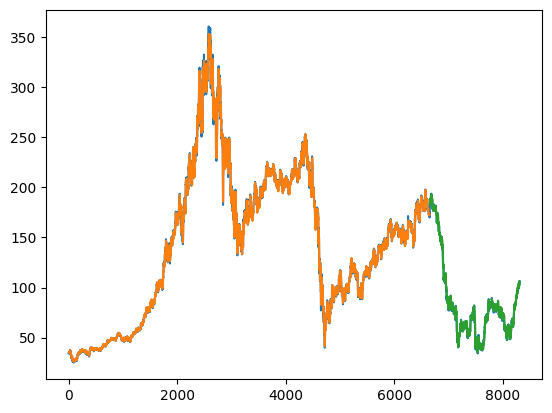

In [65]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = df['Close'].values
data = data.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data.reshape(-1, 1))

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [24]:
data_scaled

array([[-1.34781519, -1.34720822, -1.34242379, -1.34280414, -1.62446669],
       [-1.34267254, -1.33534031, -1.338956  , -1.33337923, -1.61798943],
       [-1.33324439, -1.33534031, -1.33028652, -1.33337923, -1.61798943],
       ...,
       [-0.35456731, -0.36058338, -0.35163226, -0.36185366,  0.33404812],
       [-0.36552929, -0.36207414, -0.35177089, -0.36199066,  0.33383286],
       [-0.35936313, -0.3711541 , -0.35939368, -0.35884015,  0.33878278]])

In [25]:
X_train = []
Y_train = []

In [26]:
x_future = 1   
x_past = 19


for i in range(x_past, len(data_scaled) - x_future +1):
    X_train.append(data_scaled[i - x_past:i, 0:data_scaled.shape[1]])
    Y_train.append(data_scaled[i + x_future - 1:i + x_future, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

print('x_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(Y_train.shape))

x_train shape == (8295, 19, 5).
y_train shape == (8295, 1).


In [27]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 19, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
467/467 [==============================] - 3s 5ms/step - loss: 0.0844 - val_loss: 0.0029
Epoch 2/5
467/467 [==============================] - 2s 5ms/step - loss: 0.0348 - val_loss: 0.0029
Epoch 3/5
467/467 [==============================] - 2s 5ms/step - loss: 0.0333 - val_loss: 0.0023
Epoch 4/5
467/467 [==============================] - 2s 5ms/step - loss: 0.0282 - val_loss: 0.0069
Epoch 5/5
467/467 [==============================] - 2s 5ms/step - loss: 0.0307 - val_loss: 0.0015


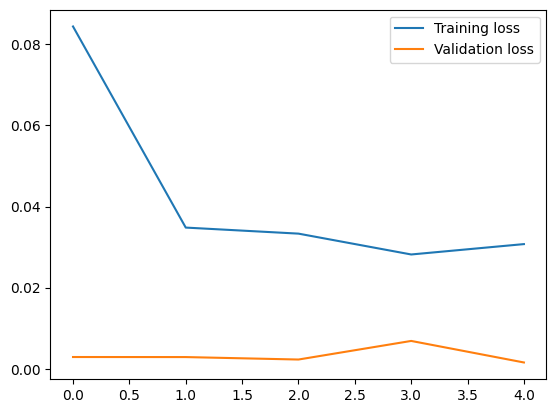

In [28]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [29]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [30]:
x_past = 16
x_days_for_prediction=20

In [31]:
dates = pd.to_datetime(df['Date'])

In [32]:
predict_dates = pd.date_range(list(dates)[-x_past], periods=x_days_for_prediction, freq=us_bd).tolist()
print(predict_dates)

[Timestamp('2023-05-18 00:00:00'), Timestamp('2023-05-19 00:00:00'), Timestamp('2023-05-22 00:00:00'), Timestamp('2023-05-23 00:00:00'), Timestamp('2023-05-24 00:00:00'), Timestamp('2023-05-25 00:00:00'), Timestamp('2023-05-26 00:00:00'), Timestamp('2023-05-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-01 00:00:00'), Timestamp('2023-06-02 00:00:00'), Timestamp('2023-06-05 00:00:00'), Timestamp('2023-06-06 00:00:00'), Timestamp('2023-06-07 00:00:00'), Timestamp('2023-06-08 00:00:00'), Timestamp('2023-06-09 00:00:00'), Timestamp('2023-06-12 00:00:00'), Timestamp('2023-06-13 00:00:00'), Timestamp('2023-06-14 00:00:00'), Timestamp('2023-06-15 00:00:00')]


In [33]:
prediction = model.predict(X_train[-x_days_for_prediction:])

1/1 [==============================] - 0s 130ms/step


In [34]:
prediction_copies = np.repeat(prediction, data.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


forecast_dates = []
for time_i in predict_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2023-5-1']
original

,Date,Open
8285,2023-05-01,99.489998
8286,2023-05-02,100.610001
8287,2023-05-03,101.879997
8288,2023-05-04,101.489998
8289,2023-05-05,100.580002
8290,2023-05-08,100.220001
8291,2023-05-09,100.769997
8292,2023-05-10,101.480003
8293,2023-05-11,99.400002
8294,2023-05-12,99.580002


<Axes: xlabel='Date', ylabel='Open'>

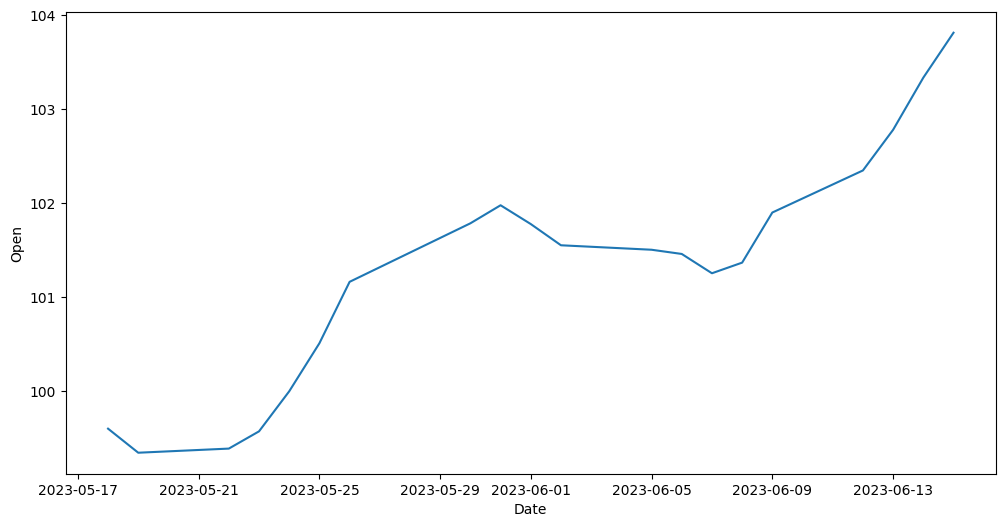

In [35]:
# sns.lineplot(x=original['Date'], y=original['Open'])
plt.figure(figsize=(12,6))
sns.lineplot(x=df_forecast['Date'], y=df_forecast['Open'])